In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
car_data=pd.read_csv("datasets3.csv",encoding='ANSI')
car_data.head()


,Distance(km),Fuel_Type,Location,year,price,manufacturer,Model,drive,condition,cylinders,transmission,type,paint_color,size,title_status
0,48200,Diesel,NaN,2016,3200000,Audi,Q3 35 TDI Technology,NaN,NaN,NaN,automatic,other,blue,NaN,clean
1,55310,Diesel,Mumbai,2013,245000,Audi,Q3 2.0 TDI quattro,rwd,NaN,6 cylinders,automatic,convertible,blue,NaN,clean
2,30120,Diesel,Nadia,2013,255000,Audi,Q3 2.0 TDI quattro,NaN,excellent,NaN,automatic,NaN,blue,NaN,clean
3,98000,Diesel,New Delhi,2011,249900,Audi,A8 L- 2013 3.0 TDI quattro,fwd,NaN,NaN,automatic,SUV,orange,NaN,clean
4,42000,Diesel,New Delhi,2009,220000,Audi,A8 (2003 - 2010) 3.0 TDi,NaN,NaN,NaN,automatic,NaN,NaN,NaN,clean


In [4]:
car_data.describe()

,Distance(km),year,price
count,1.728000e+04,17280.000000,1.728000e+04
mean,6.703187e+04,2011.800289,9.886584e+06
std,7.223008e+04,3.042742,8.864240e+07
min,0.000000e+00,1998.000000,1.020000e+04
25%,3.777350e+04,2010.000000,3.600000e+04
50%,5.945350e+04,2012.000000,7.550000e+04
75%,8.355300e+04,2014.000000,2.350000e+05
max,7.175673e+06,2019.000000,1.000000e+09


In [5]:
car_data.drop(['drive','condition','type','Location','size'],axis='columns',inplace=True)


In [6]:
car_data.columns

Index(['Distance(km)', 'Fuel_Type', 'year', 'price', 'manufacturer', 'Model',
       'cylinders', 'transmission', 'paint_color', 'title_status'],
      dtype='object')

In [7]:
car_data_dup=car_data.drop_duplicates(['Distance(km)', 'Fuel_Type', 'year', 'price', 'manufacturer', 'Model',
       'cylinders', 'transmission', 'paint_color', 'title_status'])
car_data_dup.head()

,Distance(km),Fuel_Type,year,price,manufacturer,Model,cylinders,transmission,paint_color,title_status
0,48200,Diesel,2016,3200000,Audi,Q3 35 TDI Technology,NaN,automatic,blue,clean
1,55310,Diesel,2013,245000,Audi,Q3 2.0 TDI quattro,6 cylinders,automatic,blue,clean
2,30120,Diesel,2013,255000,Audi,Q3 2.0 TDI quattro,NaN,automatic,blue,clean
3,98000,Diesel,2011,249900,Audi,A8 L- 2013 3.0 TDI quattro,NaN,automatic,orange,clean
4,42000,Diesel,2009,220000,Audi,A8 (2003 - 2010) 3.0 TDi,NaN,automatic,NaN,clean


In [8]:
car_data_dup = car_data_dup[
        (car_data_dup.year <= 2020) 
      & (car_data_dup.year>= 2000) 
      & (car_data_dup.price >= 100) 
      & (car_data_dup.price <= 150000) ]

In [9]:
car_data_dup.head()

,Distance(km),Fuel_Type,year,price,manufacturer,Model,cylinders,transmission,paint_color,title_status
40,68140,Diesel,2010,149500,Audi,A6 2.0 TDI,6 cylinders,automatic,red,clean
43,60000,Diesel,2012,109500,Audi,A4 2.0 TDI Premium Plus,6 cylinders,automatic,black,clean
45,48781,Diesel,2011,125000,Audi,A4 2.0 TDI Premium Plus,8 cylinders,automatic,green,clean
52,46000,Diesel,2010,128500,Audi,A4 2.0 TDI Multitronic,NaN,automatic,NaN,clean
54,115063,Diesel,2009,112100,Audi,A4 2.0 TDI Multitronic,4 cylinders,automatic,blue,clean


In [10]:
car_data_dup.isnull().sum()

Distance(km)       0
Fuel_Type          0
year               0
price              0
manufacturer       0
Model             16
cylinders       3995
transmission      59
paint_color     3601
title_status      79
dtype: int64

In [11]:
car_data_dup['manufacturer'].fillna(value='not-cleared',inplace=True)
car_data_dup['Model'].fillna(value='not-cleared',inplace=True)
#car_data_dup['condition'].fillna(value='not-cleared',inplace=True)
car_data_dup['cylinders'].fillna(value='4 cylinders',inplace=True)
car_data_dup['Fuel_Type'].fillna(value='Diesel',inplace=True)
car_data_dup['title_status'].fillna(value='not-cleared',inplace=True)
car_data_dup['transmission'].fillna(value='not-cleared',inplace=True)
#car_data_dup['drive'].fillna(value='not-cleared',inplace=True)
#car_data_dup['size'].fillna(value='not-cleared',inplace=True)
#car_data_dup['type'].fillna(value='not-cleared',inplace=True)
car_data_dup['paint_color'].fillna(value='not-cleared',inplace=True)


In [12]:
car_data_dup.isnull().sum()

Distance(km)    0
Fuel_Type       0
year            0
price           0
manufacturer    0
Model           0
cylinders       0
transmission    0
paint_color     0
title_status    0
dtype: int64

In [13]:
%matplotlib inline

Model
Suzuki Swift VDi       437
Suzuki Alto 800 LXI    365
alto[LXI               290
Suzuki Alto K10 VXI    251
Suzuki Swift VXi       185
Name: Model, dtype: int64


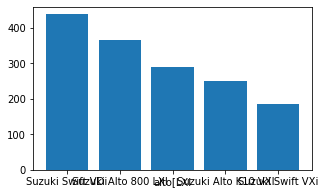

manufacturer
Maruti        3877
Hyundai       1674
Maruti        1229
Honda          666
Volkswagen     532
Name: manufacturer, dtype: int64


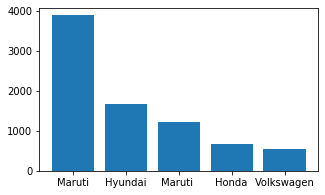

Fuel_Type
  Petrol      5843
  Diesel      3205
petrol        1166
  LPG           87
  CNG           80
Name: Fuel_Type, dtype: int64


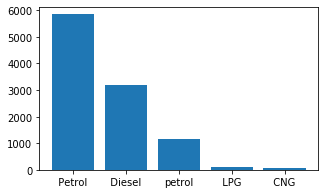

year
2013    1350
2012    1347
2014    1320
2011    1174
2015    1062
Name: year, dtype: int64


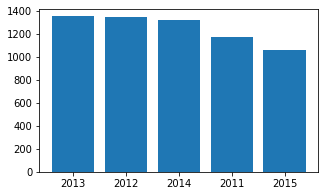

cylinders
4 cylinders     5952
6 cylinders     2372
8 cylinders     2055
5 cylinders       59
10 cylinders      44
Name: cylinders, dtype: int64


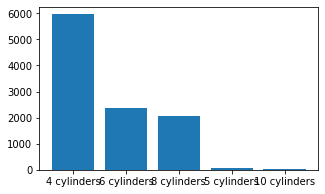

In [14]:
categories = ['Model', 'manufacturer', 'Fuel_Type','year','cylinders']

for i, c in enumerate(categories):
    v = car_data_dup[c].unique()
    g = car_data_dup.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))
    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    plt.xticks(r, g.index)
    plt.show()